In [ ]:
#ReLU

import numpy as np
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# make_moons 데이터 생성
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP 분류기 생성 (ReLU 활성화 함수 사용)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42)

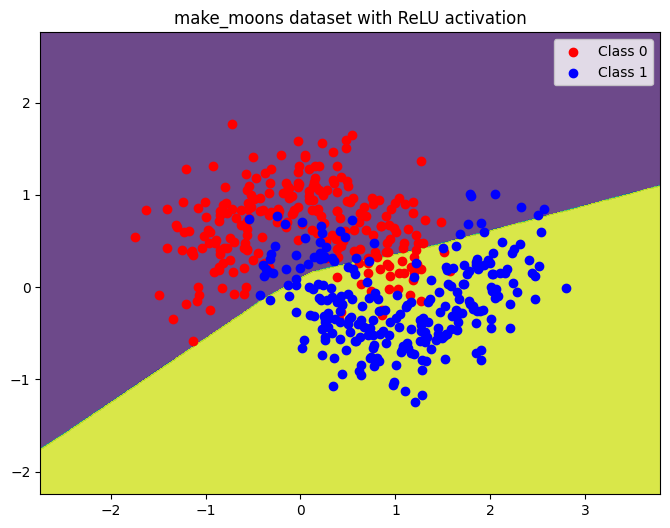

In [ ]:
# 결정 경계 시각화를 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 그리드의 각 점에 대한 예측값 계산
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('make_moons dataset with ReLU activation')
plt.show()

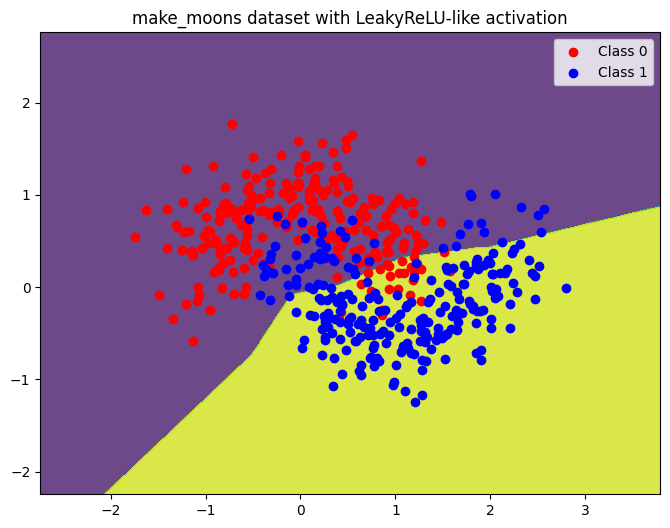

In [ ]:
# Leaky ReLU 효과

import numpy as np
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# make_moons 데이터 생성
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP 분류기 생성 (LeakyReLU와 유사한 효과를 얻기 위해 alpha 값을 조정)
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', alpha=0.001, max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)

# 결정 경계 시각화를 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 그리드의 각 점에 대한 예측값 계산
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('make_moons dataset with LeakyReLU-like activation')
plt.show()

10260/10260 [==============================] - 14s 1ms/step


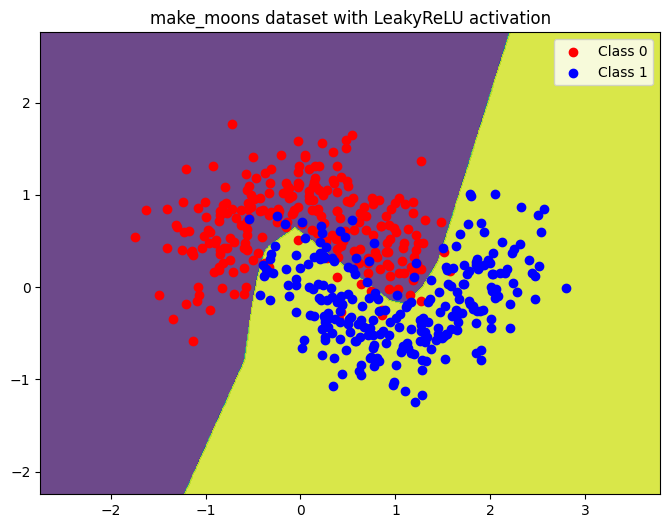

In [ ]:
# LeakyReLU

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# 데이터 생성
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=2))
model.add(LeakyReLU(alpha=0.01))  # LeakyReLU 활성화 함수 적용
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('make_moons dataset with LeakyReLU activation')
plt.show()

10260/10260 [==============================] - 16s 2ms/step


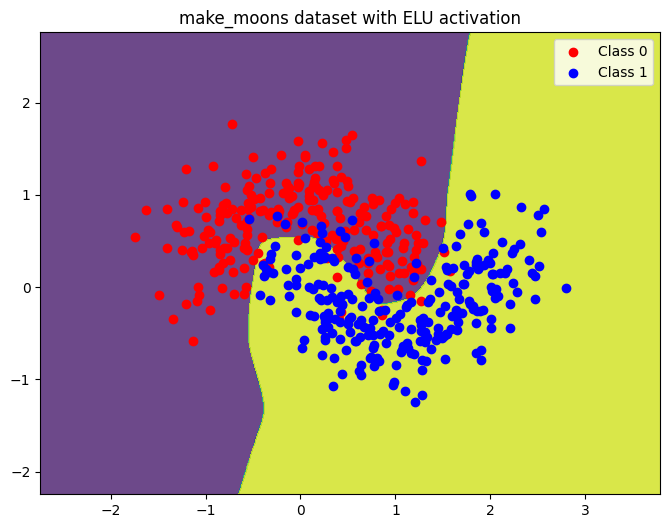

In [ ]:
# ELU

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import elu

# 데이터 생성
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=2))
model.add(Dense(10, activation=elu))  # ELU 활성화 함수 적용
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title('make_moons dataset with ELU activation')
plt.show()